#### This is an initial analysis of the adult.data data set, found (here)[https://archive.ics.uci.edu/ml/machine-learning-databases/adult/]. A description of the data set and a few facts are in adult.names.

#### The overall data set and each of its features are analyzed separately and a conclusion is given an the end of each section.

# overall

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

adult_data = "data/adult.data"

In [2]:
import pandas as pd

df = pd.read_csv(adult_data, header=0)

print("There are {} columns:".format(len(df.columns)))
for i in df.columns:
    print(i)

print("There are {} records.".format(len(df)))

There are 15 columns:
age
workclass
fnlwgt
education
education-num
marital-status
occupation
relationship
race
sex
capital-gain
capital-loss
hours-per-week
native-country
label
There are 32561 records.


In [3]:
# Add a boolean column for labels
df[">50K"] = df["label"] == ">50K"

In [4]:
(df == "?").sum()

/home/gershie/.local/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
label                0
>50K                 0
dtype: int64

#### There is a small number of ? values for three categorical columns

# age

,age,>50K
age,1.000000,0.234037
>50K,0.234037,1.000000


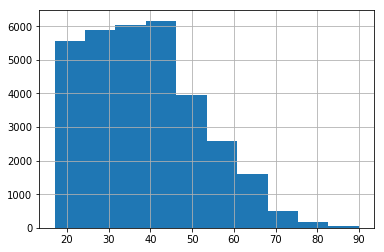

In [5]:
df[["age", ">50K"]].corr()
df["age"].hist()

#### Conclusion: age seems correlated to the class label and can be used as a numeric feature

# workclass

In [6]:
df.groupby("workclass").size().sort_values(ascending=False)

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
dtype: int64

#### Conclusion: Use workclass as a categorical feature. Without-pay and Never-worked lack enough data to be meaningful.

# fnlwgt

#### The description of the data set says the following:

People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

#### This isn't clear to me, and since the data set doesn't relate samples to states, I question whether this contain an information.

In [7]:
df[["fnlwgt", ">50K"]].corr()

,fnlwgt,>50K
fnlwgt,1.000000,-0.009463
>50K,-0.009463,1.000000


#### There does not appear to be any correlation between fnlwgt and the class label. A comment from [this Kaggle page]( https://www.kaggle.com/uciml/adult-census-income/discussion/32698) suggests that fnlwgt refers to the number of units in the target population that the sample applies to.

In [8]:
agg = df.agg({"fnlwgt": ["sum", "min", "max"]})
agg
df[df["fnlwgt"] == agg["fnlwgt"]["max"]]

,fnlwgt
sum,6179373392
min,12285
max,1484705


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label,>50K
14449,25,Private,1484705,Some-college,10,Divorced,Exec-managerial,Unmarried,White,Female,0,0,25,United-States,<=50K,False


#### The numbers of fnlwgt seem too high to represent the US population, with a single sample having a weight of _1.4 million_. Still, the weights might be relative. I'm curious to see what the coverage of samples if. Maybe it's possible to compare the weights of nearest neighbours to determine a probability of the class label without doing any machine learning.

In [9]:
import matplotlib

# Join samples that differ only in their label
df_less = df[df["label"] == "<=50K"]
df_more = df[df["label"] == ">50K"]
columns = [x for x in df if x not in ["fnlwgt", "label", ">50K"]]
joined = pd.merge(df_less, df_more, how="outer", left_on=columns, right_on=columns)

# Calculate the percentage of 
joined[">50K_%"] = joined["fnlwgt_y"]/(joined["fnlwgt_x"]+joined["fnlwgt_y"])
joined[["age", "workclass", "education-num", "occupation", "relationship", "race", "sex", "native-country", "fnlwgt_y", "fnlwgt_x", ">50K_%"]][joined[">50K_%"]>0].sort_values(">50K_%")

,age,workclass,education-num,occupation,relationship,race,sex,native-country,fnlwgt_y,fnlwgt_x,>50K_%
7506,53,Private,9,Craft-repair,Husband,White,Male,United-States,29658.0,548361.0,0.051310
8935,34,Private,10,Craft-repair,Husband,White,Male,United-States,35644.0,532379.0,0.062751
18457,46,Private,9,Exec-managerial,Husband,White,Male,United-States,29696.0,405309.0,0.068266
1485,50,Private,9,Craft-repair,Husband,White,Male,United-States,31621.0,421132.0,0.069842
1541,50,Private,9,Craft-repair,Husband,White,Male,United-States,31621.0,410186.0,0.071572
1487,50,Private,9,Craft-repair,Husband,White,Male,United-States,33304.0,421132.0,0.073286
2449,38,Private,9,Craft-repair,Husband,White,Male,United-States,40077.0,497788.0,0.074511
1543,50,Private,9,Craft-repair,Husband,White,Male,United-States,33304.0,410186.0,0.075095
7727,43,Private,9,Craft-repair,Husband,White,Male,United-States,34007.0,403276.0,0.077769
6029,31,Private,13,Prof-specialty,Husband,White,Male,United-States,19302.0,226443.0,0.078545


#### There are only 2353 matches of samples that differ only in their class label. Of these, the percentages of samples don't make much sense. The top and bottom rows above differ only in the age column but in one we have 6% likely donors and the other 94%.

#### Conclusion: I can't tell what fnlwgt is and so it can't be used.

# education and education-num

In [10]:
df.groupby(["education", "education-num"]).size().to_frame().sort_values("education-num")

,,0
education,education-num,
Preschool,1,51
1st-4th,2,168
5th-6th,3,333
7th-8th,4,646
9th,5,514
10th,6,933
11th,7,1175
12th,8,433
HS-grad,9,10501


In [11]:
df[["education-num", ">50K"]].corr()

,education-num,>50K
education-num,1.000000,0.335154
>50K,0.335154,1.000000


#### Conclusion: The education and education-num columns are perfectly correlated so only one is needed. education-num is continuous so it contains more information. education can be ignored. education-num is correlated to the class label so it should be useful for prediction.

# marital-status

marital-status         >50K 
Divorced               False     3980
                       True       463
Married-AF-spouse      False       13
                       True        10
Married-civ-spouse     False     8284
                       True      6692
Married-spouse-absent  False      384
                       True        34
Never-married          False    10192
                       True       491
Separated              False      959
                       True        66
Widowed                False      908
                       True        85
dtype: int64

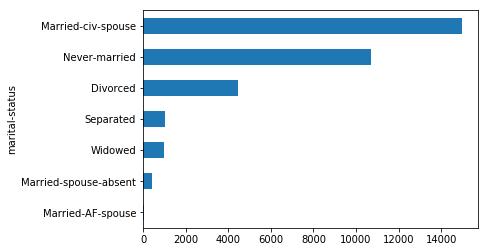

In [12]:
df.groupby(["marital-status", ">50K"]).size()
df.groupby("marital-status").size().sort_values().plot.barh()

#### Decision: Categories of marital-status appear to have significant variation in % likely donors so it can be used as a categorical feature. Married-civ-spouse and Married-AF-spouse can be combined according to [this PDF](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&ved=2ahUKEwiYg5vY9OLhAhWnV98KHcprCCwQFjAAegQIBRAC&url=https%3A%2F%2Ffaculty.biu.ac.il%2F~yahavi1%2FProjects%2FCP2010T1_rep.pdf&usg=AOvVaw3_MFXafhJpMk_QXFZgDU41).

# occupation

occupation         >50K 
?                  False    1652
                   True      191
Adm-clerical       False    3263
                   True      507
Armed-Forces       False       8
                   True        1
Craft-repair       False    3170
                   True      929
Exec-managerial    False    2098
                   True     1968
Farming-fishing    False     879
                   True      115
Handlers-cleaners  False    1284
                   True       86
Machine-op-inspct  False    1752
                   True      250
Other-service      False    3158
                   True      137
Priv-house-serv    False     148
                   True        1
Prof-specialty     False    2281
                   True     1859
Protective-serv    False     438
                   True      211
Sales              False    2667
                   True      983
Tech-support       False     645
                   True      283
Transport-moving   False    1277
                  

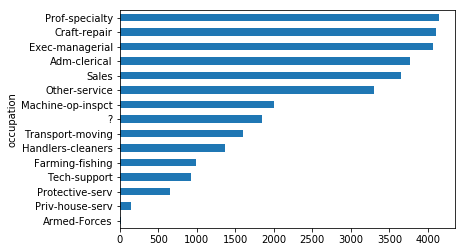

In [13]:
df.groupby(["occupation", ">50K"]).size()
df.groupby("occupation").size().sort_values().plot.barh()

#### Decision: Categories of occupation appear to have significant variation in % likely donors so it can be used as a categorical feature.

# relationship

relationship    >50K 
Husband         False    7275
                True     5918
Not-in-family   False    7449
                True      856
Other-relative  False     944
                True       37
Own-child       False    5001
                True       67
Unmarried       False    3228
                True      218
Wife            False     823
                True      745
dtype: int64

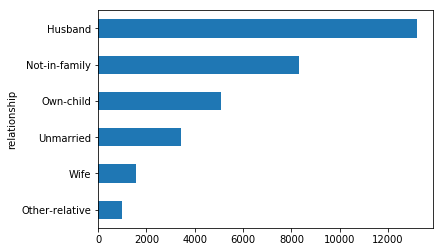

In [14]:
df.groupby(["relationship", ">50K"]).size()
df.groupby("relationship").size().sort_values().plot.barh()

#### Decision: Categories of relationship appear to have significant variation in % likely donors so it can be used as a categorical feature. There seems to be some redundancy with the marital status feature.

# race

race                >50K 
Amer-Indian-Eskimo  False      275
                    True        36
Asian-Pac-Islander  False      763
                    True       276
Black               False     2737
                    True       387
Other               False      246
                    True        25
White               False    20699
                    True      7117
dtype: int64

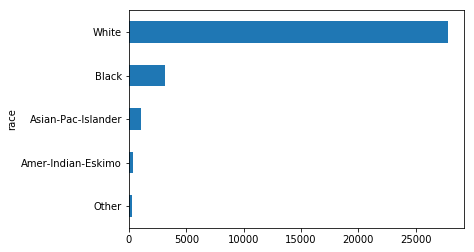

In [15]:
df.groupby(["race", ">50K"]).size()
df.groupby("race").size().sort_values().plot.barh()

#### Decision: Categories of race appear to have significant variation in % likely donors so it can be used as a categorical feature.

# sex

,Male,>50K
Male,1.00000,0.21598
>50K,0.21598,1.00000


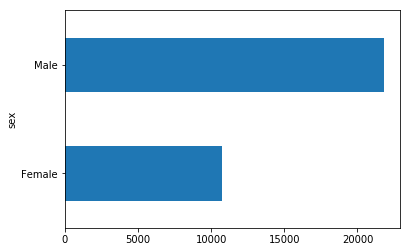

In [16]:
df.groupby("sex").size().sort_values().plot.barh()
df["Male"] = df["sex"] == "Male"
df[["Male", ">50K"]].corr()
df["Male"] = None

#### Decision: sex can be used as a boolean feature. There is redundancy here with the Husband/Wife values of the relationship feature.

# capital-gain and capital-loss

In [17]:
df[["capital-gain", ">50K"]].corr()
len(df["capital-gain"] == 0)
df[df["capital-gain"] > 0][["capital-gain", ">50K"]].corr()

,capital-gain,>50K
capital-gain,1.000000,0.223329
>50K,0.223329,1.000000


32561

,capital-gain,>50K
capital-gain,1.000000,0.329301
>50K,0.329301,1.000000


In [18]:
df[["capital-loss", ">50K"]].corr()
len(df["capital-loss"] == 0)
df[df["capital-loss"] > 0][["capital-loss", ">50K"]].corr()

,capital-loss,>50K
capital-loss,1.000000,0.150526
>50K,0.150526,1.000000


32561

,capital-loss,>50K
capital-loss,1.000000,0.288221
>50K,0.288221,1.000000


#### Conclusion: Although capital-gain and capital-loss contain quite a few zero values, the values are correlated to the class label so they can be useful for prediction.

# hours-per-week

,hours-per-week,>50K
hours-per-week,1.000000,0.229689
>50K,0.229689,1.000000


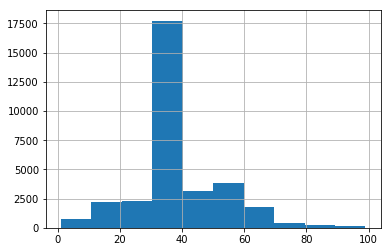

In [19]:
df[["hours-per-week", ">50K"]].corr()
df["hours-per-week"].hist()

#### Conclusion: hours-per-week is correlated to to the class label so it can be useful for prediction

# native-country

In [20]:
df.groupby(["native-country", ">50K"]).size()

native-country              >50K 
?                           False      437
                            True       146
Cambodia                    False       12
                            True         7
Canada                      False       82
                            True        39
China                       False       55
                            True        20
Columbia                    False       57
                            True         2
Cuba                        False       70
                            True        25
Dominican-Republic          False       68
                            True         2
Ecuador                     False       24
                            True         4
El-Salvador                 False       97
                            True         9
England                     False       60
                            True        30
France                      False       17
                            True        12
Germany             

In [21]:
# Get the number of samples for each country, then the number of >50K samples for each country
native_country = df.groupby("native-country").size().to_frame().reset_index()
native_country.columns = ["native-country", "count"]
native_country_50K = df[df[">50K"]].groupby("native-country").size().to_frame().reset_index()
native_country_50K.columns = ["native-country", "count50K"]

# Join the data frames together to be able to calculate the percentage of samples from each country that are likely donors
joined = pd.merge(native_country_50K, native_country, how="left", left_on=["native-country"], right_on="native-country")
joined["50K_share"] = joined["count50K"]/joined["count"]
joined.sort_values("50K_share", ascending=False)

,native-country,count50K,count,50K_share
19,Iran,18,43,0.418605
10,France,12,29,0.413793
18,India,40,100,0.400000
34,Taiwan,20,51,0.392157
23,Japan,24,62,0.387097
39,Yugoslavia,6,16,0.375000
1,Cambodia,7,19,0.368421
21,Italy,25,73,0.342466
9,England,30,90,0.333333
2,Canada,39,121,0.322314


#### Conclusion: There isn't a lot of data from countries other than the US, but at first glance there seems to be a trend that European and Asian countries have a higher percentage of likely donors than Central and South American countries. (Of course, this is not controlled for all of the other features. But this feature on its own seems to have predictive power.) It may be preferable to group countries into, say, continents. Better still, this column could be converted into a numeric column by using some suitable index. Maybe https://en.wikipedia.org/wiki/World_Giving_Index? Additional work would be needed to validate whether this is a useful approach.

# Interactions

#### While interactions between features has not be analyzed in depth, some redundancies have been noted. Some further analysis  is needed to confirm perfect correlations that would allow some values to be dropped. (Husband/Wife in relationship is expected to be perfectly correlated to Male/Female in sex; Unmarried in relationship is expected to correspond to a subset of marital-status).